In [9]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import scienceplots
%matplotlib inline

import sys
sys.path.append("../../../src")

import nanonets_utils

data_folder = "/home/jonas/phd/data/system_size/scaled/"

In [3]:
# Parameter
N_min   = 3
N_max   = 16
N_keys  = N_max-N_min+1
N_vals  = [i for i in range(N_min,N_max+1)]
N_e     = 8

# Boolean On and Off
off_states  = np.array(N_keys*[0.0])
# on_states   = np.round((np.array([0.69, 0.77, 0.84, 0.92, 1. , 1.08, 1.16, 1.23, 1.31, 1.39, 1.47, 1.55, 1.62, 1.70, 1.78, 1.86])*0.01),4)
on_states   = np.round((np.array([0.75, 0.82, 0.89, 0.96, 1. , 1.06, 1.11, 1.17, 1.22, 1.28, 1.33, 1.41, 1.50, 1.62, 1.85, 2.13])*0.01),4)

# Current Conditions
min_error   = 0.0
max_error   = 0.5
min_current = 0.0

data, data_nc = nanonets_utils.get_boolean_data(data_folder, N=N_vals, N_e=N_e, off_state=off_states, on_state=on_states,
                                                min_currents=min_current, min_error=min_error, max_error=max_error)

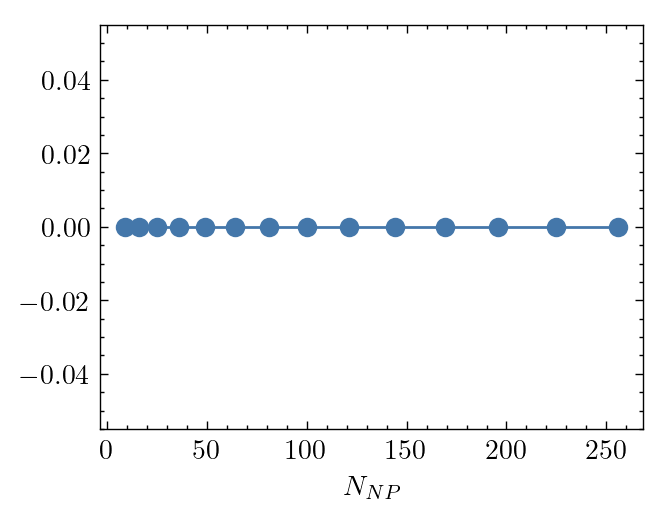

In [4]:
p_deleted = np.array([len(data_nc[N])/(len(data[N])+len(data_nc[N])) for N in N_vals])

with plt.style.context(["science","bright"]):

    fig = plt.figure(dpi=200)
    ax  = fig.add_subplot()

    ax.stem(np.array(N_vals)**2, p_deleted*100, basefmt='')

    ax.set_xlabel("$N_{NP}$")

## Fitness Abundance

In [10]:
gates       = ['AND','OR','XOR','NAND','NOR','XNOR']
delta       = 0.0
bins        = 0
fitness     = {N : nanonets_utils.fitness(df=data[N], N_controls=(N_e-3), delta=delta, off_state=off_states[i], on_state=on_states[i], gates=gates) for i, N in enumerate(N_vals)}
abundance   = {N : nanonets_utils.abundance(df=fitness[N], bins=bins) for N in N_vals}

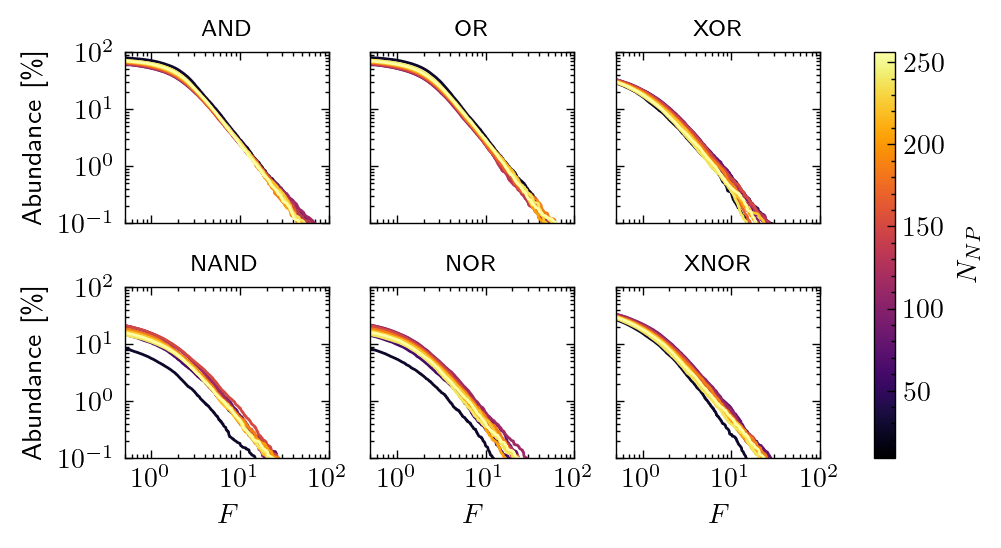

In [17]:
cmap_c  = 'inferno'
cmap    = plt.get_cmap(cmap_c)
nrows   = 2
ncols   = 3

with plt.style.context(["science","bright"]):

    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, dpi=200, layout='constrained')
    fig.set_figwidth(fig.get_figwidth()*1.4)

    for i, gate in enumerate(gates):

        ax  = axes.flat[i]

        for j, N in enumerate(N_vals):

            df  = abundance[N]
            ax.plot(df[f'{gate} Fitness'], df[f'{gate} Fitness Abundance'], c=cmap((j+1)/N_keys))
        
        ax.set_xlim(0.5,100)
        ax.set_ylim(0.1,100)
        ax.set_xscale('log')
        ax.set_yscale('log')
        ax.set_title(gate, fontsize='small')
        
        if i % ncols == 0:
            ax.set_ylabel('Abundance [\%]')
        else:
            ax.set_yticklabels("")
        
        if i >= (nrows-1)*ncols:
            ax.set_xlabel('$F$')
        else:
            ax.set_xticklabels("")
    
    norm    = mpl.colors.Normalize(vmin=N_min**2, vmax=N_max**2)
    cbar    = mpl.cm.ScalarMappable(norm=norm, cmap=cmap_c)
    fig.colorbar(cbar, ax=axes.ravel(), label='$N_{NP}$')

---

## Nonlinear Parameter

In [12]:
# Current Relations
params  = {N : nanonets_utils.nonlinear_parameter(data[N], off_state=off_states[i], on_state=on_states[i]) for i, N in enumerate(N_vals)}

# NDR
Q_ndr_l = np.array([nanonets_utils.return_ndr(params[N]['Ml']) for N in N_vals])
Q_ndr_r = np.array([nanonets_utils.return_ndr(params[N]['Mr']) for N in N_vals])
Q_ndr   = (Q_ndr_l + Q_ndr_r) / 2

# NLS
bins    = 500
Q_nls   = np.array([nanonets_utils.return_nls(df=params[N], bins=bins) for N in N_vals])

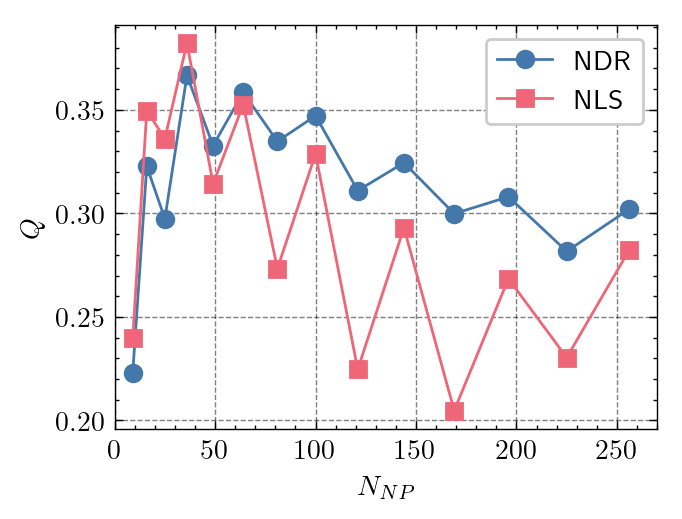

In [13]:
with plt.style.context(["science","bright","grid"]):

    fig = plt.figure(dpi=200)
    ax  = fig.add_subplot()
    
    ax.plot(np.array(N_vals)**2, Q_ndr, '-o', label='NDR')
    ax.plot(np.array(N_vals)**2, Q_nls, '-s', label='NLS')

    ax.set_xlabel('$N_{NP}$')
    ax.set_ylabel('$Q$')
    ax.legend(loc='upper right')
    ax.set_xlim(0,270)

---